In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import nanonets
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from scipy.optimize import curve_fit
from scipy.special import gamma
plt.style.use(["science","bright","grid"])

cm  = plt.get_cmap('cividis')
ma  = ["o","s","^","v","<",">"]

## DC Input - Voltage Distribution - Closed Circuit

In [143]:
def shift_and_append(dfs_dict,col=1):
    for name, df in dfs_dict.items():
        col1 = df.pop(f"{col}")
        df.columns = range(df.shape[1])
        df[len(df.columns)] = col1
    return dfs_dict

def drop_columns(dfs_dict):
    for name, df in dfs_dict.items():
        df = df.drop(columns=[1,2,3,4,5,6])
        df.columns = range(df.shape[1])
        dfs_dict[name] = df
    return dfs_dict

folder      = "/home/j/j_mens07/phd/data/2_funding_period/potential/wo_magic_cable/dc_input_vs_volt/"
U0_vals     = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
N_p         = 9
N_particles = N_p*N_p
N_voltages  = 50000
t_vals      = np.arange(N_voltages-1)*1e-10*1e9
np_idx      = [5+9*i for i in range(N_p)]+[82]

pot_2       = {U_0 : pd.read_csv(f"{folder}mean_state_Nx={N_p}_Ny={N_p}_Ne=2_{U_0:.3f}.csv").round(5) for U_0 in U0_vals}
pot_2       = shift_and_append(pot_2)
pot_eq_2    = pd.DataFrame([pot_2[U_0].iloc[48000:,:].mean().values / U_0 for U_0 in U0_vals],index=U0_vals).T.round(2)

pot_8       = {U_0 : pd.read_csv(f"{folder}mean_state_Nx={N_p}_Ny={N_p}_Ne=8_{U_0:.3f}.csv").round(5) for U_0 in U0_vals}
pot_8       = shift_and_append(pot_8, col=7)
pot_8       = drop_columns(pot_8)
pot_eq_8    = pd.DataFrame([pot_8[U_0].iloc[48000:,:].mean().values / U_0 for U_0 in U0_vals],index=U0_vals).T.round(2)

### Characteristic Time Scale

Text(0.5, 0.98, '$N_p = 81$, $N_e = 2$')

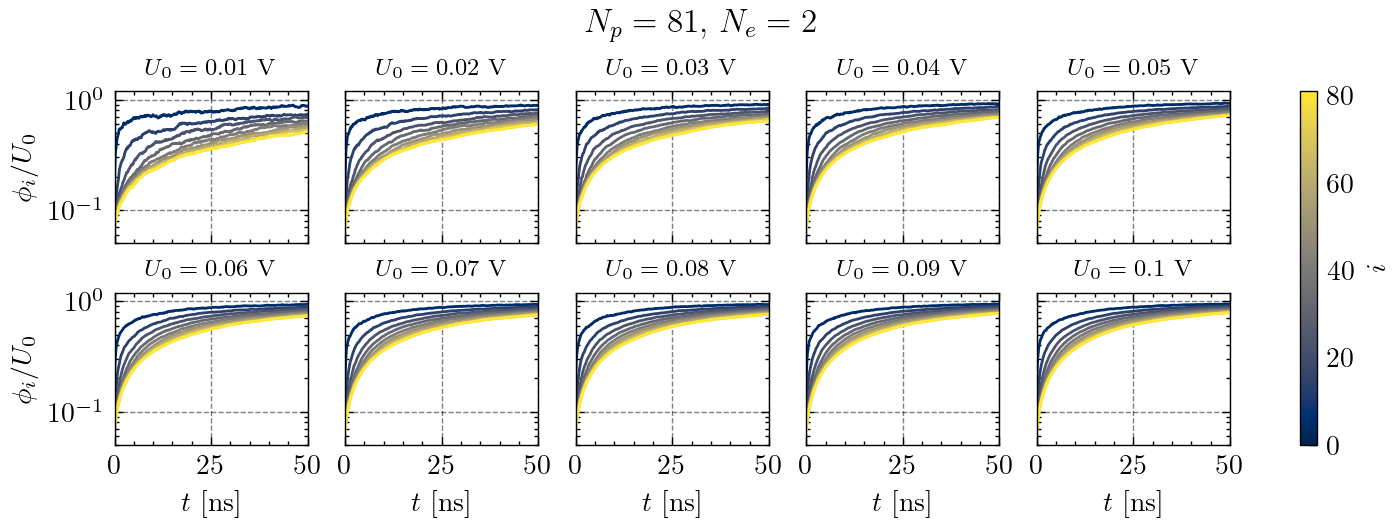

In [149]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=81)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in np_idx:
        ax.plot(t_vals, pot_2[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")
fig.suptitle("$N_p = 81$, $N_e = 2$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

Text(0.5, 0.98, '$N_p = 81$, $N_e = 8$')

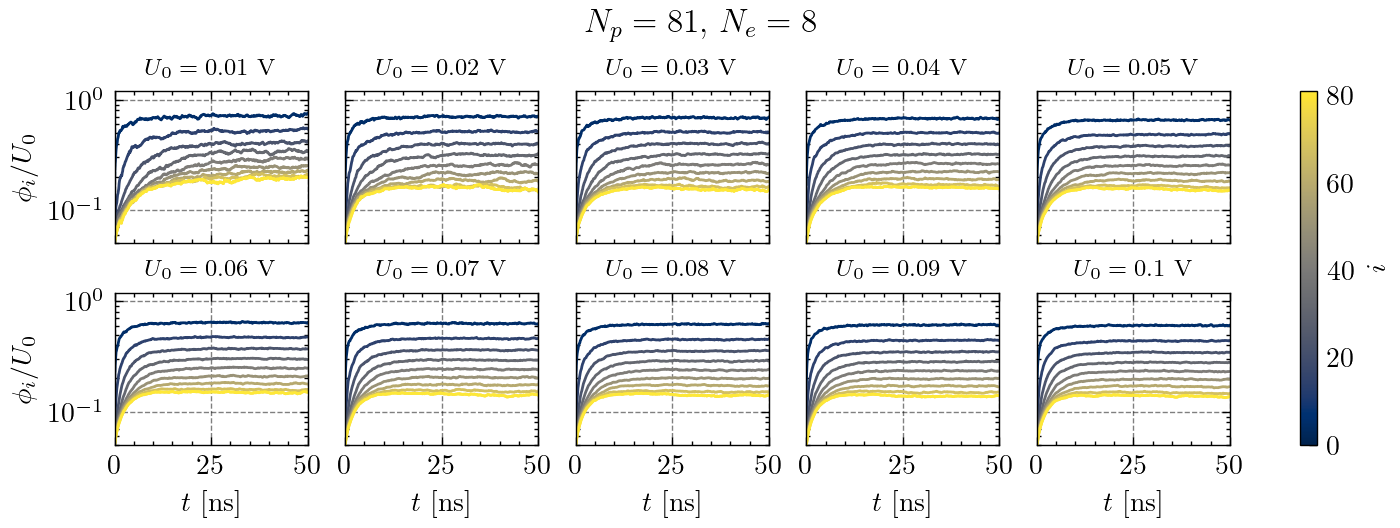

In [150]:
fig     = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm    = Normalize(vmin=0, vmax=81)
all_ax  = []

for n, U_0 in enumerate(U0_vals):
    ax = fig.add_subplot(2,5,n+1)
    all_ax.append(ax)
    for i in np_idx:
        ax.plot(t_vals, pot_8[U_0][i].values/U_0, color=cm(norm(i)))
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.set_xlim(0,50)
    ax.set_ylim(0.05,1.2)
    ax.set_yscale('log')
    
    if n % 5 == 0:
        ax.set_ylabel("$\phi_i / U_0$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$t$ [ns]")
    else:
        ax.set_xticklabels("")

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$i$")
fig.suptitle("$N_p = 81$, $N_e = 8$")

# fig.savefig("../plots/dc_input/linear/closed_circuit_node_time_series.svg", transparent=True)

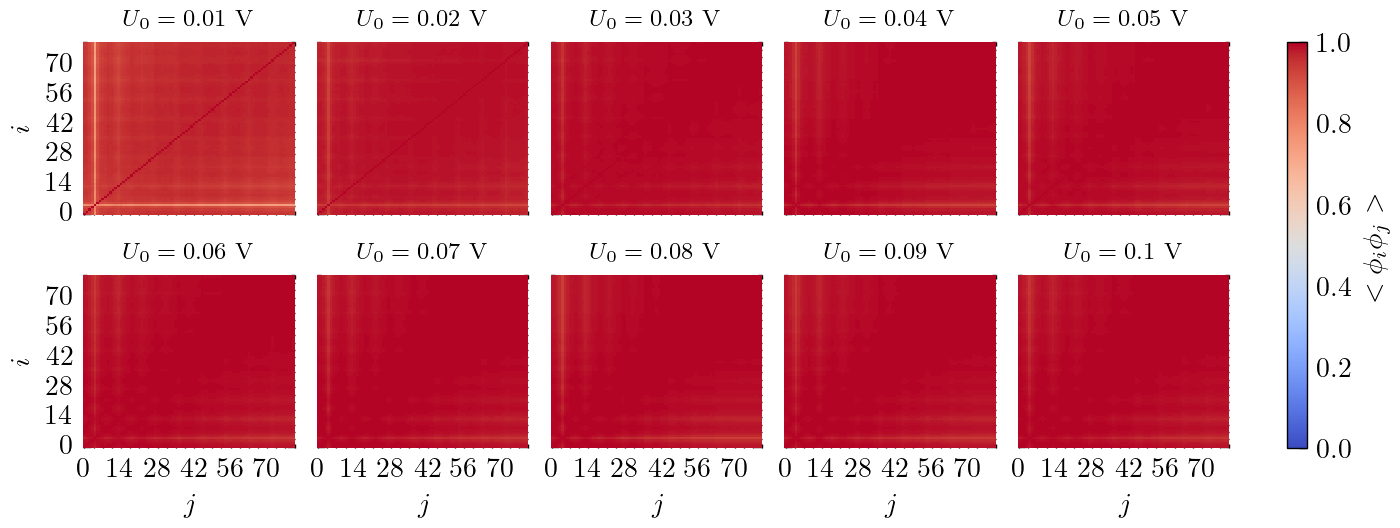

In [151]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_2[U_0].drop(columns=[0,82]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

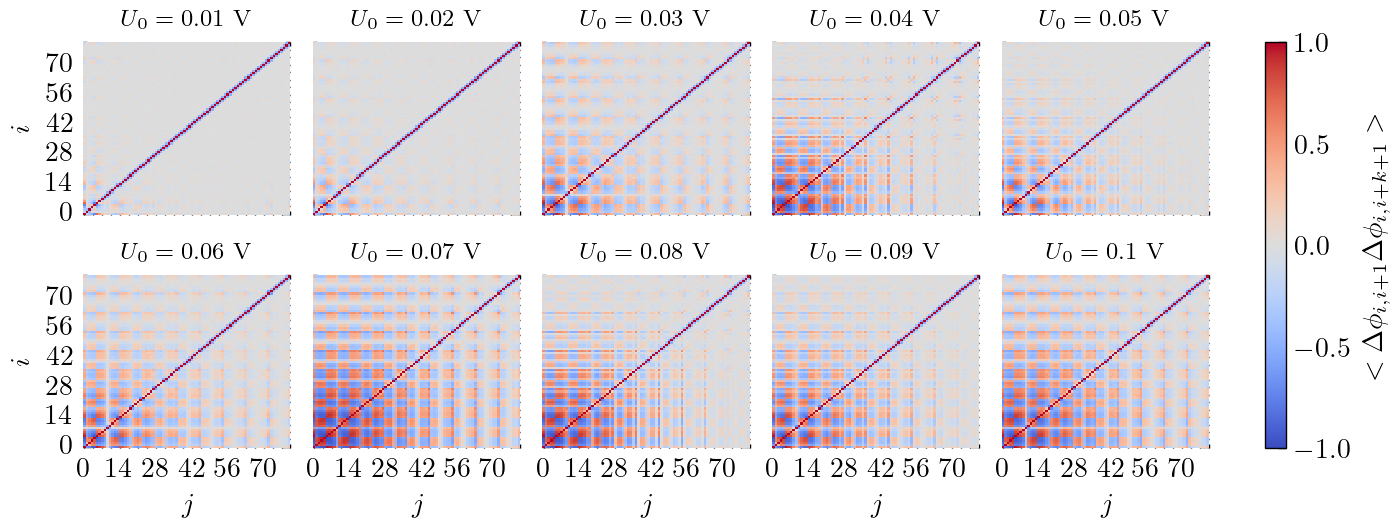

In [152]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_2[U_0].diff(axis=1).drop(columns=[0,82]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

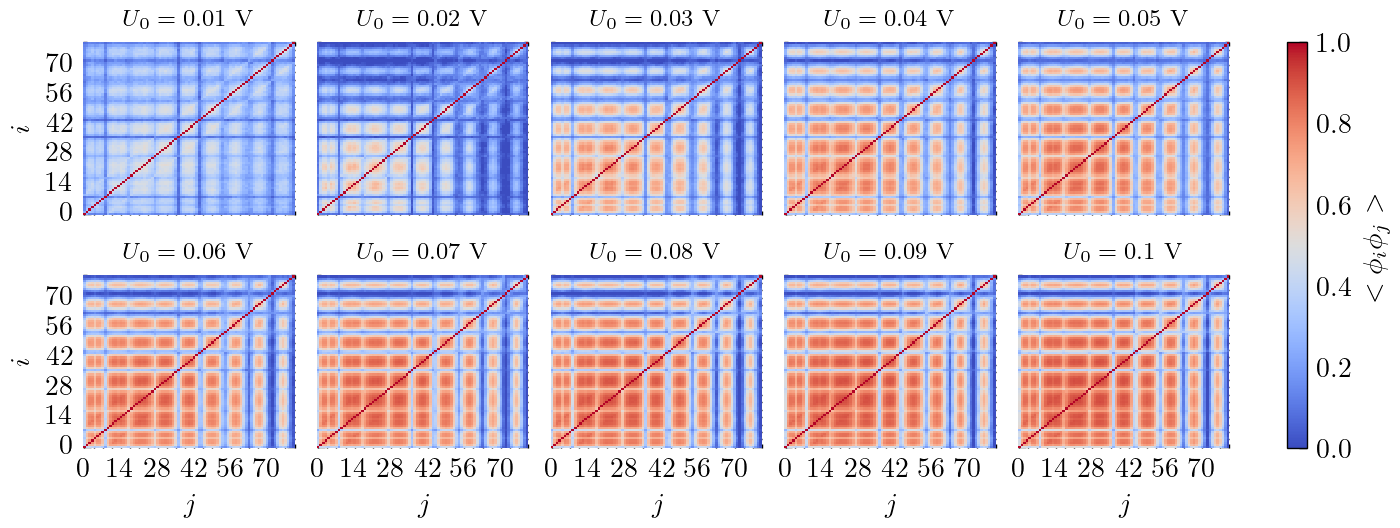

In [153]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=0, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_8[U_0].drop(columns=[0,82]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=0, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\phi_{i}\phi_{j}>$")

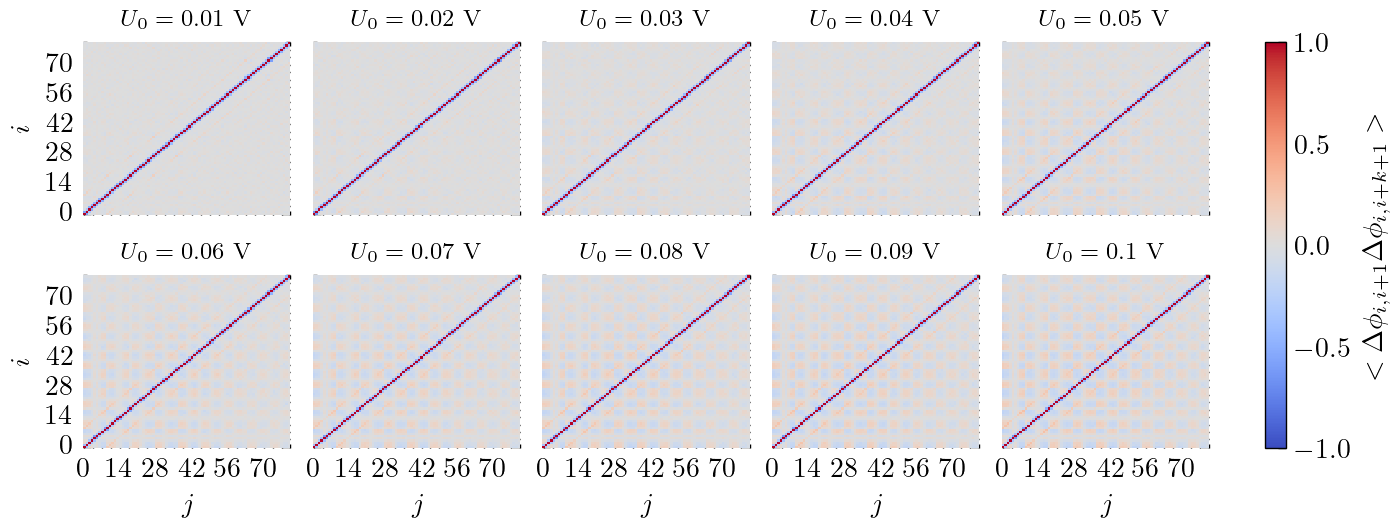

In [154]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
all_ax  = []
norm    = Normalize(vmin=-1, vmax=1)

for n, U_0 in enumerate(U0_vals):

    ax = fig.add_subplot(2,5,n+1)
    df = pd.DataFrame(pot_8[U_0].diff(axis=1).drop(columns=[0,82]).values)
    ax = sns.heatmap(df.corr(), cmap='coolwarm', vmin=-1, vmax=1, cbar=False)
    _  = plt.yticks(rotation=0)
    all_ax.append(ax)

    if n % 5 == 0:
        ax.set_ylabel("$i$")
    else:
        ax.set_yticklabels("")
    if n >= 5:
        ax.set_xlabel("$j$")
    else:
        ax.set_xticklabels("")
        
    ax.set_title(f"$U_0 = {U_0}$ V", fontsize='small')
    ax.invert_yaxis()

sm  = ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=all_ax)
cbar.set_label("$<\Delta\phi_{i,i+1}\Delta\phi_{i,i+k+1}>$")

In [155]:
p_vals_2, cov_vals_2 = {}, {}
p0, p1 = 0.9, 0.995
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_particles+1):

        x       = t_vals.copy()
        y       = pot_2[U_0].loc[:,k].values
        y_max   = np.mean(y[-1000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))

        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_2[U_0] = np.array(p_tmp)
    cov_vals_2[U_0] = np.array(cov_tmp)

In [195]:
p_vals_8, cov_vals_8 = {}, {}
p0, p1 = 0.9, 0.995
for U_0 in U0_vals:
    p_tmp, cov_tmp = [], []
    for k in range(1, N_particles+1):

        x       = t_vals.copy()
        y       = pot_8[U_0].loc[:,k].values
        y_max   = np.mean(y[-1000:])
        def func(t, tau, a0):
            return y_max - a0*np.exp(-t/tau)
        
        t0      = np.argmax(y>p0*y_max)
        t1      = np.argmax(y>p1*y_max)
        x_fit   = x.copy()[t0:t1]
        y_fit   = y.copy()[t0:t1]
        try:
            p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))
        except:
            p   = np.array([0,0])
            cov = np.array([[0.0,0.0],[0.0,0.0]])
        p_tmp.append(p)
        cov_tmp.append(cov)
    p_vals_8[U_0] = np.array(p_tmp)
    cov_vals_8[U_0] = np.array(cov_tmp)

/tmp/ipykernel_32171/1503570068.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  p, cov  = curve_fit(func, x_fit, y_fit, p0=[20,y_max], bounds=((0,0),(np.inf,np.inf)))


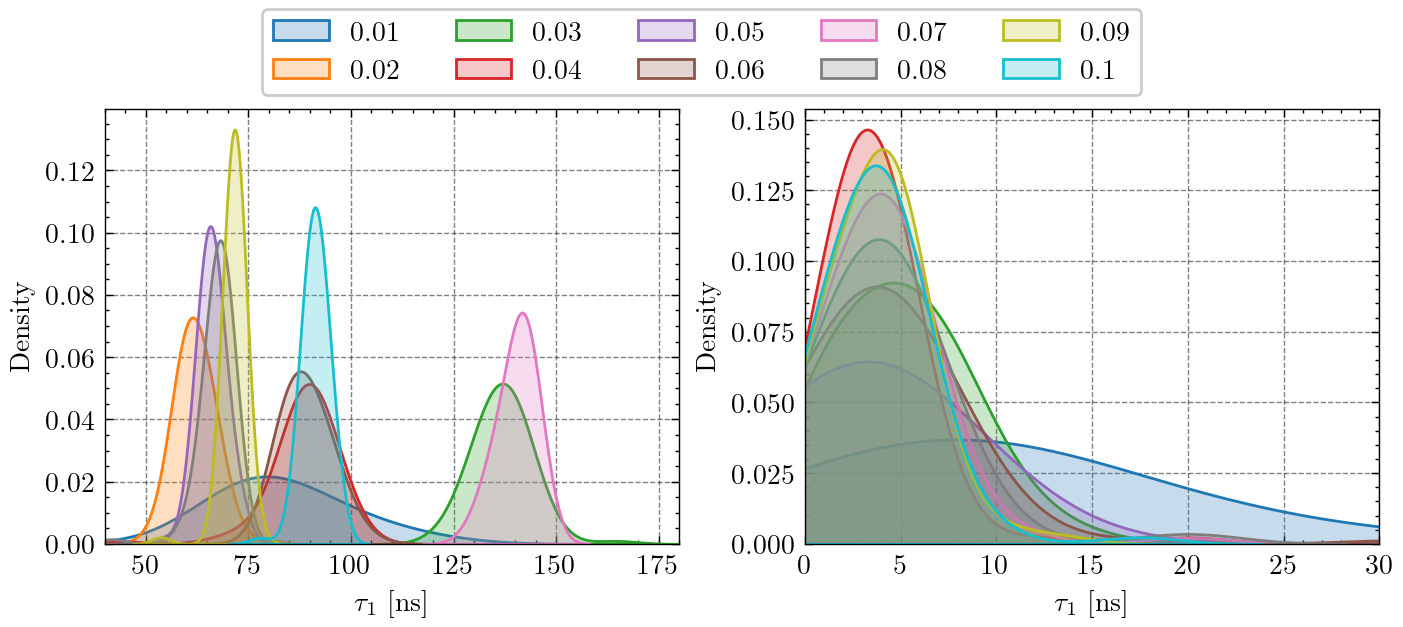

In [216]:
fig = plt.figure(dpi=200, layout='constrained')
fig.set_figwidth(fig.get_figwidth()*2)
norm = Normalize(vmin=U0_vals[0], vmax=U0_vals[-1])
ax  = fig.add_subplot(1,2,1)
cm2 = plt.get_cmap("tab10")

for U_0 in U0_vals:
    arr = p_vals_2[U_0][:,0].copy()
    ax  = sns.kdeplot(arr, color=cm2(norm(U_0)), fill=True, bw_adjust=2)
    ax.set_xlim(40,180)
    ax.set_xlabel("$\\tau_1$ [ns]")

ax = fig.add_subplot(1,2,2)
for U_0 in U0_vals:
    arr = p_vals_8[U_0][:,0].copy()
    ax  = sns.kdeplot(arr, color=cm2(norm(U_0)), fill=True, bw_adjust=2)
    ax.set_xlim(0,30)
    ax.set_xlabel("$\\tau_1$ [ns]")

fig.legend(U0_vals, bbox_to_anchor=(0.5, 1.2), ncol=5, loc='upper center', shadow=False)